# ICC World cup 2023 Data Analysis
<img src="https://tse2.mm.bing.net/th/id/OIP.jeYvhVMLSLfX3o9UNvEZQwHaDs?pid=Api&P=0&h=180" alt="Description" width="200" height="400"/>


In [1]:
# This step is to import all the libraries that we are going to use in this project

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing files in the jupyter notebook.

wc_matches = pd.read_csv(r"C:\Users\nivya\Downloads\matches.csv")

In [3]:
# reading file in jupyter notebook

wc_matches.head()

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,reserve_umpire,match_referee,winner,winner_runs,winner_wickets,match_type
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,Sharfuddoula,J Srinath,New Zealand,NaN,9.0,Group
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,PR Reiffel,JJ Crowe,Pakistan,81.0,NaN,Group
2,2023/24,Afghanistan,Bangladesh,2023/10/07,3,Himachal Pradesh Cricket Association Stadium,Dharamsala,Bangladesh,field,Mehedi Hasan Miraz,JS Wilson,HDPK Dharmasena,M Erasmus,AJ Pycroft,Bangladesh,NaN,6.0,Group
3,2023/24,South Africa,Sri Lanka,2023/10/07,4,Arun Jaitley Stadium,Delhi,Sri Lanka,field,AK Markram,RK Illingworth,Sharfuddoula,AG Wharf,J Srinath,South Africa,102.0,NaN,Group
4,2023/24,Australia,India,2023/10/08,5,MA Chidambaram Stadium,Chennai,Australia,bat,KL Rahul,CB Gaffaney,RA Kettleborough,AT Holdstock,RB Richardson,India,NaN,6.0,Group


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 1. Data filtering and cleaning 🧹

In [53]:
wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           48 non-null     object
 1   team1            48 non-null     object
 2   team2            48 non-null     object
 3   date             48 non-null     object
 4   match_number     48 non-null     int64 
 5   venue            48 non-null     object
 6   city             48 non-null     object
 7   toss_winner      48 non-null     object
 8   toss_decision    48 non-null     object
 9   player_of_match  48 non-null     object
 10  umpire1          48 non-null     object
 11  umpire2          48 non-null     object
 12  winner           48 non-null     object
 13  winner_runs      48 non-null     int64 
 14  winner_wickets   48 non-null     int64 
dtypes: int64(3), object(12)
memory usage: 5.8+ KB


In [5]:
# finding the null values in the data

wc_matches.isnull().sum()

season              0
team1               0
team2               0
date                0
match_number        0
venue               0
city                0
toss_winner         0
toss_decision       0
player_of_match     0
umpire1             0
umpire2             0
reserve_umpire      1
match_referee       0
winner              0
winner_runs        24
winner_wickets     24
match_type          0
dtype: int64

In [6]:
# Filling null values to 0

wc_matches.fillna(0, inplace = True)

In [7]:
# changing the data type for the columns which have unappropritedata type

wc_matches[["winner_runs","winner_wickets"]] = wc_matches[["winner_runs","winner_wickets"]].astype(int)

In [8]:
# Recheking the changes we made i.e. null values equals to 0 and changing datatypes float to int

wc_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   season           48 non-null     object
 1   team1            48 non-null     object
 2   team2            48 non-null     object
 3   date             48 non-null     object
 4   match_number     48 non-null     int64 
 5   venue            48 non-null     object
 6   city             48 non-null     object
 7   toss_winner      48 non-null     object
 8   toss_decision    48 non-null     object
 9   player_of_match  48 non-null     object
 10  umpire1          48 non-null     object
 11  umpire2          48 non-null     object
 12  reserve_umpire   48 non-null     object
 13  match_referee    48 non-null     object
 14  winner           48 non-null     object
 15  winner_runs      48 non-null     int64 
 16  winner_wickets   48 non-null     int64 
 17  match_type       48 non-null     obje

In [9]:
# Droping the unwanated columns from the data

wc_matches.drop(["match_type","reserve_umpire","match_referee"],axis = 1, inplace = True)

In [10]:
wc_matches.columns

Index(['season', 'team1', 'team2', 'date', 'match_number', 'venue', 'city',
       'toss_winner', 'toss_decision', 'player_of_match', 'umpire1', 'umpire2',
       'winner', 'winner_runs', 'winner_wickets'],
      dtype='object')

In [11]:
wc_matches.head(2)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,winner,winner_runs,winner_wickets
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,New Zealand,0,9
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,Pakistan,81,0


![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# 2. Exploratory Data Analysis

## 1. Which team won the most matches?

In [12]:
team_wins = wc_matches["winner"].value_counts()
top_team = team_wins.head(1)

print(f"The team won the most matches is: {top_team.index[0]}")

The team won the most matches is: India


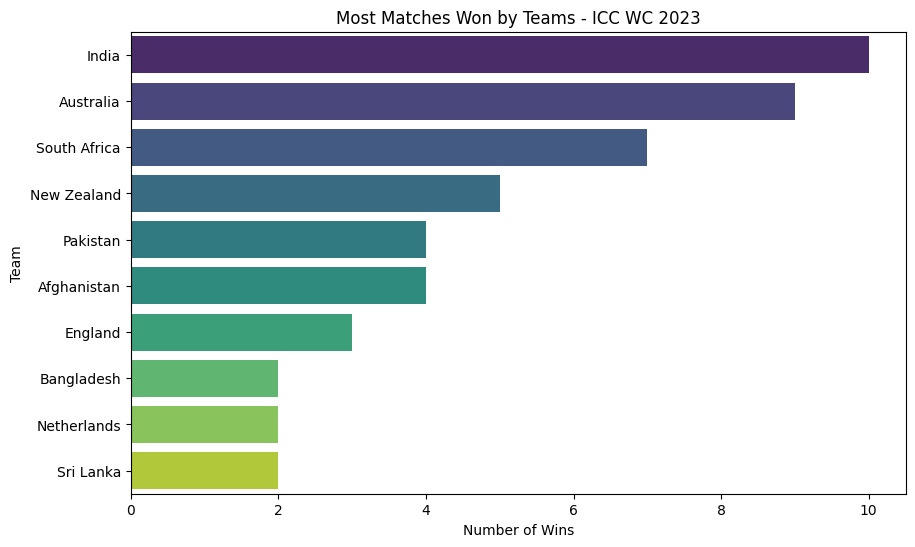

In [30]:
plt.figure(figsize=(10, 6))
sns.barplot(x=team_wins.values, y=team_wins.index, palette="viridis",hue =team_wins.index,
                                                                            legend = False)
plt.title("Most Matches Won by Teams - ICC WC 2023")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.show()

## 2. Which team had the highest average margin of victory (by runs or wickets)?

In [38]:
avr_margin_r = wc_matches.groupby( by = ["winner"], as_index = False)["winner_runs"].mean().sort_values(by = "winner_runs",ascending = False)
avr_margin_w = wc_matches.groupby( by = ["winner"], as_index = False)["winner_wickets"].mean().sort_values(by = "winner_wickets",ascending = False)
topper_r = avr_margin_r.head(1)
topper_w = avr_margin_w.head(1)

print(f"The team which has the highest average margin of victory by runs is:{topper_r}")
print(f"The team which has the highest average margin of victory by wickets is:{topper_w}")

The team which has the highest average margin of victory by runs is:    winner  winner_runs
3  England        130.0
The team which has the highest average margin of victory by wickets is:      winner  winner_wickets
9  Sri Lanka             6.5


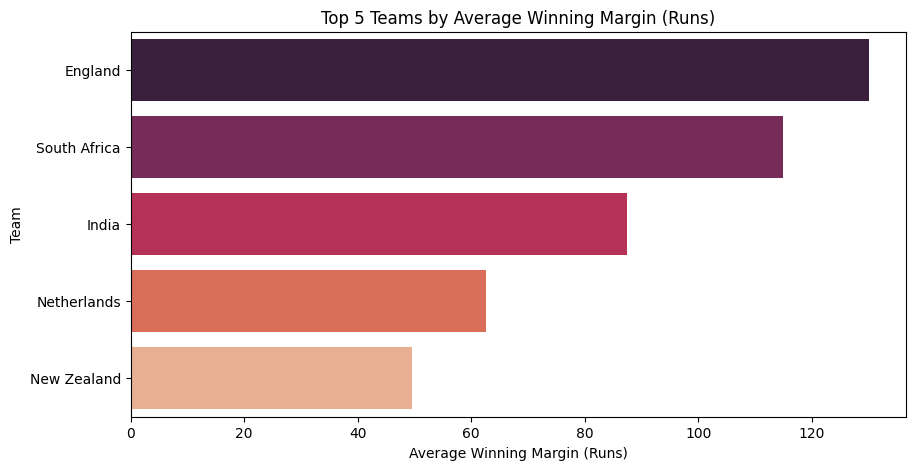

In [41]:
plt.figure(figsize=(10, 5))
sns.barplot(data=avr_margin_r.head(5), x="winner_runs", y="winner", palette="rocket",hue = "winner",
                                                                        legend = False)
plt.title("Top 5 Teams by Average Winning Margin (Runs)")
plt.xlabel("Average Winning Margin (Runs)")
plt.ylabel("Team")
plt.show()

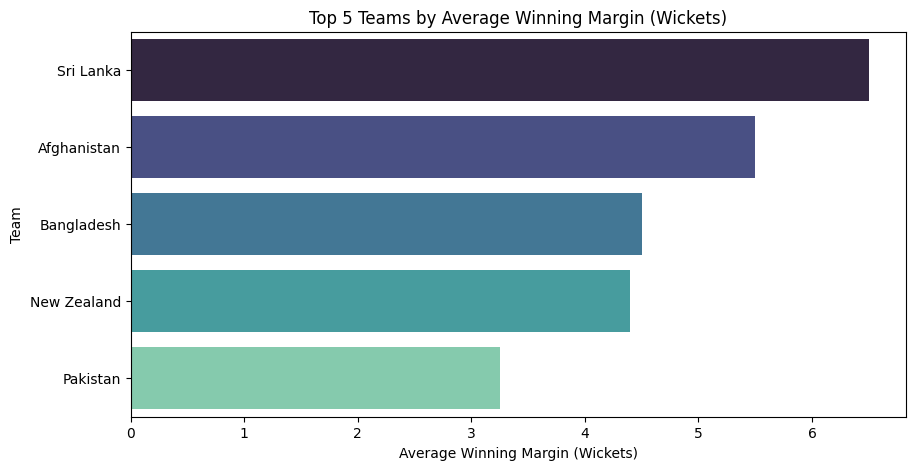

In [42]:
plt.figure(figsize=(10, 5))
sns.barplot(data=avr_margin_w.head(5), x="winner_wickets", y="winner", palette="mako", hue = "winner",
                                                                      legend = False)
plt.title("Top 5 Teams by Average Winning Margin (Wickets)")
plt.xlabel("Average Winning Margin (Wickets)")
plt.ylabel("Team")
plt.show()

## 3. Which team chased the most successfully? (i.e., won while fielding first)

In [43]:
chasing_wins = wc_matches[wc_matches['winner_wickets'] > 0]
chasing = chasing_wins.groupby(by = ["winner"])["winner_wickets"].count().sort_values(ascending = False)
winner1 = chasing.head(2)

print(f"The team which chased the most successfully is {winner1}")

The team which chased the most successfully is winner
Australia    5
India        5
Name: winner_wickets, dtype: int64


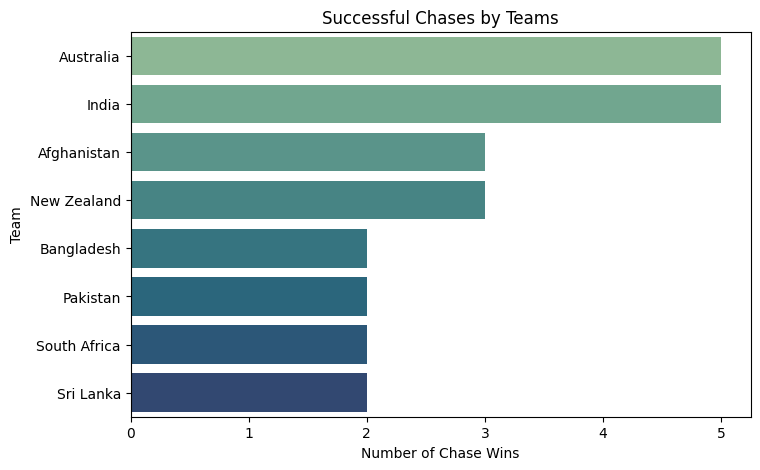

In [44]:
plt.figure(figsize=(8, 5))
sns.barplot(x=chasing.values, y=chasing.index, palette="crest", hue = chasing.index, legend = False)
plt.title("Successful Chases by Teams")
plt.xlabel("Number of Chase Wins")
plt.ylabel("Team")
plt.show()


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Conclusion on Exploratory Data Analysis
<img src="https://tse3.mm.bing.net/th/id/OIP.eD4AVsz9f_v8nmYiBaxyiAHaD5?pid=Api&P=0&h=1800" alt="Description" width="150" height="75"/>

### Here is the quick summary of how all teams performed and which are the teams shows their dominance in the Wrold cup 2023.


1).  India won the most matches in the tournament, highlighting their consistent performance throughout         the World Cup.

2).  We calculated average victory margin separately for:
         winner_runs (when team batted first)
         winner_wickets (when team chased)

Which resulted :- 

South Africa had the highest average margin of victory by runs, showcasing dominant batting and            bowling performances.
India had a strong average margin of victory by wickets, reflecting their ability to chase targets         with ease.

3).  we filtered matches where winner_wickets > 0, indicating a successful chase.

Which Resulted :-

India chased the most matches successfully, showing their strength while fielding first and                efficiently chasing down targets.

In [15]:
wc_matches.head(2)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,winner,winner_runs,winner_wickets
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,New Zealand,0,9
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,Pakistan,81,0


In [15]:
wc_matches.head(2)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,winner,winner_runs,winner_wickets
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,New Zealand,0,9
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,Pakistan,81,0


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# 3. Team INDIA performance analysis 
<img src="https://tse4.mm.bing.net/th/id/OIP.X0-nUjqQwcxKyiEfVDgyngHaE8?pid=Api&P=0&h=180" alt="Description" width="150" height="75"/>


# Batting 🏏

In [16]:
 # Reading anather data file for analysis of batting performance of team India

batting = pd.read_csv(r"C:\Users\nivya\Downloads\Batting_Stats.csv")

In [17]:
batting.head(2)

,Player,Country,Match_Played,Inning,Not_out,Runs,High_Score,Average,Ball_Faced,SR,100,50,0,4s,6s
0,RG Sharma,IND,11,11,0,597,131,54.27,474,125.94,1,3,1,66,31
1,SS Iyer,IND,11,11,3,530,128*,66.25,468,113.24,2,3,1,37,24


## 1. What was India’s average score when batting first?

In [18]:
india = (wc_matches["winner"] == "India") & (wc_matches["winner_runs"] != 0) #We created a mask named india
avg_score = india.mean()
print(f"India's average score when batting first in the ICC World Cup 2023 was {round(avg_score,3)} runs.")


India's average score when batting first in the ICC World Cup 2023 was 0.104 runs.


## 2. Which Indian batsman scored the most runs in the tournament?

In [34]:
IND = batting["Country"] == "IND"

most_runs = batting[IND][["Player","Runs"]].head(1)
print(f"Indian player who score the most runs in the ICC worldcup 2023 is {most_runs.index[0]}")

Indian player who score the most runs in the ICC worldcup 2023 is 0


## 3. What was the average and strike rate of each Indian batter?

In [37]:
avg = batting["Country"] == 'IND'
batting_avg = batting[avg][["Player","Average"]]

strike_rate = batting[avg][["Player","SR"]]

print(f"Average of each Indian player is {batting_avg}")
print(f"Strike rate of each Indian player is {strike_rate}")

Average of each Indian player is            Player Average
0      RG Sharma    54.27
1        SS Iyer    66.25
16  Shubman Gill    44.25
25      KL Rahul    75.33
26       V Kohli    95.62
58     RA Jadeja    40.00
70  Ishan Kishan    23.50
86     HH Pandya        -
Strike rate of each Indian player is            Player      SR
0      RG Sharma   125.94
1        SS Iyer   113.24
16  Shubman Gill   106.94
25      KL Rahul    90.76
26       V Kohli    90.31
58     RA Jadeja   101.69
70  Ishan Kishan    97.91
86     HH Pandya   137.50


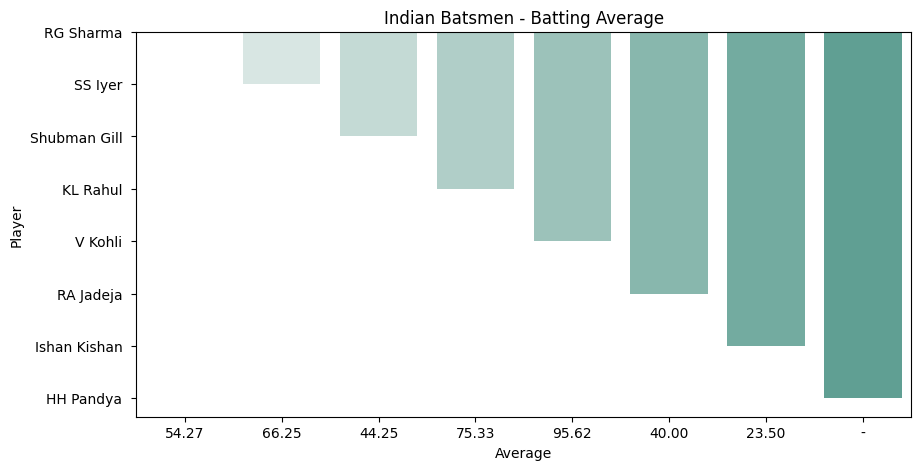

In [48]:
plt.figure(figsize=(10, 5))
sns.barplot(data=batting[batting["Country"] == "IND"], x="Average", y="Player", palette="light:#5A9",
                                                               hue = "Average", legend = False)
                                                            
plt.title("Indian Batsmen - Batting Average")
plt.xlabel("Average")
plt.ylabel("Player")
plt.show()

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)


# Bowling ⚾

In [21]:
 # Reading anather data file for analysis of bowling performance of team India

bowling = pd.read_csv(r"C:\Users\nivya\Downloads\Bowling_Stats.csv")

In [22]:
bowling.head(10)

,Bowlers,Country,Match_Played,Innings,Balls,Overs,maiden,Runs,Wkts,BBI,Average,Economy,Strike Rate,4'w,5'w
0,Mohammed Shami,IND,7,7,293,48.5,4,257,24,7/57,10.70,5.26,12.20,1,3
1,A Zampa,AUS,11,11,576,96.0,1,515,23,4/8,22.39,5.36,25.04,3,0
2,D Madushanka,SL,9,9,470,78.2,4,525,21,5/80,25.00,6.70,22.38,1,1
3,JJ Bumrah,IND,11,11,551,91.5,9,373,20,4/39,18.65,4.06,27.55,1,0
4,G Coetzee,SA,8,8,381,63.3,1,396,20,4/44,19.80,6.23,19.05,1,0
5,Shaheen Shah Afridi,PAK,9,9,486,81.0,3,481,18,5/54,26.72,5.93,27.00,0,1
6,M Jansen,SA,9,9,414,69.0,3,450,17,3/31,26.47,6.52,24.35,0,0
7,RA Jadeja,IND,11,11,561,93.3,4,398,16,5/33,24.87,4.25,35.06,0,1
8,JR Hazlewood,AUS,11,11,559,93.1,8,449,16,3/38,28.06,4.81,34.93,0,0
9,MJ Santner,NZ,10,10,556,92.4,4,449,16,5/59,28.06,4.84,34.75,0,1


## 1. Who were India’s leading wicket-takers in the tournament?

In [23]:
top = bowling["Country"] == "IND"
b = bowling[top]["Bowlers"].head(1).values[0]
w = bowling[top]["Wkts"].head(1).values[0]

print(f"{b} has taken the highest wickets which is {w}.")

Mohammed Shami  has taken the highest wickets which is 24.


## 2. What were the bowling averages and economy rates of Indian bowlers?

In [24]:
avg_and_eco = bowling["Country"] == 'IND'
bowling_avg = bowling[avg_and_eco][["Bowlers","Average"]]
economy_rate = bowling[avg_and_eco][["Bowlers","Economy"]]

print(f"Average of each Indian bowler is {bowling_avg}")
print(f"Strike rate of each Indian bowler is {economy_rate}")

Average of each Indian bowler is             Bowlers  Average
0   Mohammed Shami     10.70
3        JJ Bumrah     18.65
7        RA Jadeja     24.87
15   Kuldeep Yadav     28.26
17  Mohammed Siraj     33.50
50       HH Pandya     22.60
69       SN Thakur     51.00
77       RG Sharma      7.00
78         V Kohli     15.00
79        R Ashwin     34.00
Strike rate of each Indian bowler is             Bowlers  Economy
0   Mohammed Shami      5.26
3        JJ Bumrah      4.06
7        RA Jadeja      4.25
15   Kuldeep Yadav      4.45
17  Mohammed Siraj      5.68
50       HH Pandya      6.84
69       SN Thakur      6.00
77       RG Sharma      8.40
78         V Kohli      4.28
79        R Ashwin      3.40


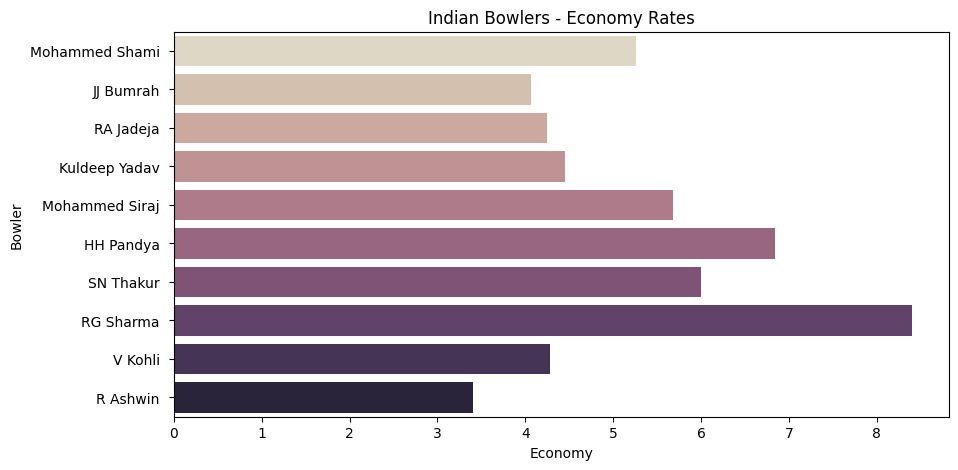

In [51]:
plt.figure(figsize=(10, 5))
sns.barplot(data=bowling[bowling["Country"] == "IND"], x="Economy", y="Bowlers", palette="ch:s=-.2,r=.6",
                                                 hue = "Bowlers", legend = False)
plt.title("Indian Bowlers - Economy Rates")
plt.xlabel("Economy")
plt.ylabel("Bowler")
plt.show()

## 3. How many maiden overs did Indian bowlers bowl in total?

In [25]:
mask = bowling["Country"] == "IND"
maiden = bowling[mask]["maiden"].count()

print(f"Total maiden overs of team India is {maiden}")

Total maiden overs of team India is 10


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# India's overall performance

In [26]:
wc_matches.head(2)

,season,team1,team2,date,match_number,venue,city,toss_winner,toss_decision,player_of_match,umpire1,umpire2,winner,winner_runs,winner_wickets
0,2023/24,England,New Zealand,2023/10/05,1,Narendra Modi Stadium,Ahmedabad,New Zealand,field,R Ravindra,HDPK Dharmasena,Nitin Menon,New Zealand,0,9
1,2023/24,Pakistan,Netherlands,2023/10/06,2,Rajiv Gandhi International Stadium,Hyderabad,Netherlands,field,Saud Shakeel,AT Holdstock,CM Brown,Pakistan,81,0


## 1. How did India perform when batting first vs chasing?

In [27]:
batting_c = (wc_matches["winner"] == "India") & (wc_matches["winner_wickets"] > 0)
performance_c = wc_matches[batting_c]["winner_wickets"].value_counts().sum()
batting1 = (wc_matches["winner"] == "India") & (wc_matches["winner_runs"] > 0)
performance1 = wc_matches[batting1]["winner_runs"].value_counts().sum()

print(f"India won {performance1} matches while batting first ")
print(f"India won {performance_c} matches while chasing")

India won 5 matches while batting first 
India won 5 matches while chasing


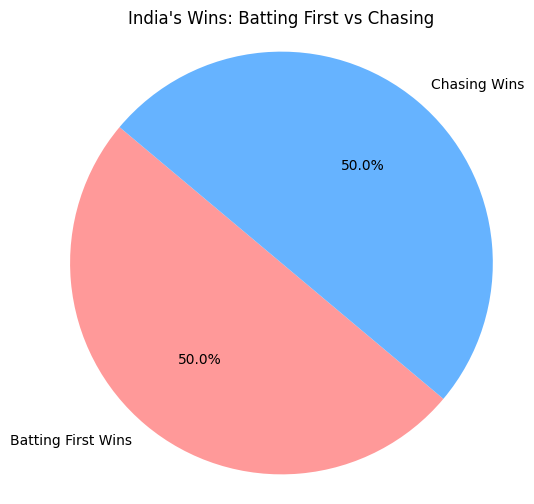

In [52]:
labels = ["Batting First Wins", "Chasing Wins"]
sizes = [performance1, performance_c]
colors = ["#ff9999","#66b3ff"]

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title("India's Wins: Batting First vs Chasing")
plt.axis('equal')
plt.show()

## 2. How many matches did India played and won?

In [28]:
played = wc_matches[(wc_matches['team1'] == 'India') | (wc_matches['team2'] == 'India')].shape[0]
India_won = wc_matches[wc_matches['winner'] == 'India'].shape[0]

print(f"Team India played {played} matches and won {India_won} of them.")

Team India played 11 matches and won 10 of them.


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)


# Conclusion on Team India's performance in the Worldcup 2023

# BATTING :-
<img src="https://tse3.mm.bing.net/th/id/OIP.n-UQfTmsli_mQ0Eo6C6vswHaFK?pid=Api&P=0&h=180" alt="Description" width="300" height="150"/>


1) Two batters from team India are in the top ten batsmen list
                   (i) Rohit Sharma (leader of the table)
                   (ii) Shreyes Iyer (second in the table)

2) India's batting average is 0.246 including batting first and chasing.

3) * The overall Indian batting perfomance was good through out the tournamnet. The openers gives a good        start every time as the Rohit sharma was one of the opening player which scores the highest runs in        the whole tournament.
   * Middle order batsman having low strike rate because their role is to stablising the situations and         reducing the pressure from the lower order batters.
   * Lower order(finishers) played with outsanding strike rate of average 120.0 which helps team India to       score good in the tournament.


# BOWLING :-
<img src="https://tse2.mm.bing.net/th/id/OIP.DuPjPsV-qvyx3yMoC_B83QHaEj?pid=Api&P=0&h=180" alt="Description" width="300" height="150"/>

1) Indian bowling performance was finominal through out the tournament as three Indian bowlers bowlers are    in the top 10 list    (i) Mohammed Shami
                         (ii) JJ Bumrah
                         (iii) RA Jadeja

2) Team India taken 99 wickets in total where spinners took 34 wickets and pacers took 65 wickets.
   Pacers played a huge role in the bowling prospective which helps team India to stand strong in the         tournament.


# INDIA'S OVERALL PERFORMANCE :-
<img src="https://tse2.mm.bing.net/th/id/OIP.Pgc6iGrpvRzmTGVywnMeggHaEo?pid=Api&P=0&h=180" alt="Description" width="300" height="150"/>


1) India played 11 matches out of which they won 10.
   There is a huge disappoinmnet as the only match team India loss was the Finals against team New Zealand    which flushed out the whole Indian performance through out the tournament.

2) * As looking to the form of team India they are the first CLAIMANT of winning the trophy.
     Batters and bowlers both performed great through out the tournament.
   * Both the leaders of the batting and bowling are the Indian players(Rohit Sharma, Mohammad Shami).
   * Most sixes and fours hits by team India.
   * India loss it's 70% of toss also loss toss in the final.
   * Highest views a match is on India v/s Pakistan as top rival of team India is Pakistan.
   * Virat Kohli scored 3 centuries in the world cup which is the highest century count in Team India.
